# **< 고양이 수염 스티커 만들기 프로젝트 >**

### Step 1. 얼굴이 잘 보이는 인물 이미지


#### 1-1. 이미지, 스티커 구하기 및 패키지 설치

- [고양이 수염 이미지 다운로드](https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1)

- [넷플릭스 오징어게임 이정재 이미지 다운로드](https://cools.kr/%EB%84%B7%ED%94%8C%EB%A6%AD%EC%8A%A4-%EC%9D%B4%EB%B2%A4%ED%8A%B8-%EC%9D%B4%EA%B1%B4-%EA%B2%8C%EC%9E%84%EC%9D%BC-%EB%BF%90%EC%9E%85%EB%8B%88%EB%8B%A4-%EB%8B%A8-456%EC%96%B5/)




In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print('완료')

완료


#### 1-2. 얼굴 검출

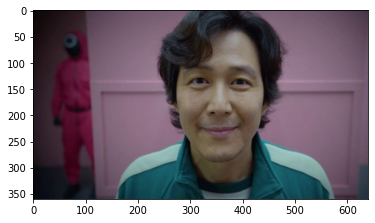

In [5]:
# 'OpenCV로 이미지 읽어오기' : 사이즈 변경, rgb로 변경

import os
my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/image2.jpg'
img_bgr = cv2.imread(my_image_path)
img_bgr = cv2.resize(img_bgr, (640, 360))
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(262, 98) (448, 284)]]
<class 'dlib.rectangles'>


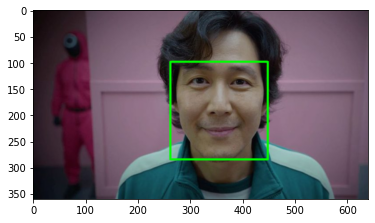

In [16]:
# 'detector 선언'

import dlib
detector_hog = dlib.get_frontal_face_detector()

dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표
print(type(dlib_rects))

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 1-3. 랜드마크 검출

landmarks points : 68


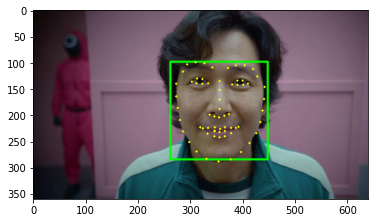

In [17]:
# 'landmark 모델 불러오기'

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


# 'landmarks points 수 출력'

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print('landmarks points :', len(list_landmarks[0]))


# 'landmarks 출력'

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # point를 yellow로 표시

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 1-4. 스티커 및 스티커 위치 좌표 확인

In [6]:
# '코 중심점(landmark[30]) 좌표확인' : 고양이 수염을 코 위에 올리면 되기 때문

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('코 중심점 좌표 (x,y) : (%d,%d)'%(x,y))
    print ('dlib_rect 크기 (w,h) : (%d,%d)'%(w,h))
    print(' ')

코 중심점 좌표 (x,y) : (356,188)
dlib_rect 크기 (w,h) : (187,187)
 


고양이수염 size : (187, 187, 3)


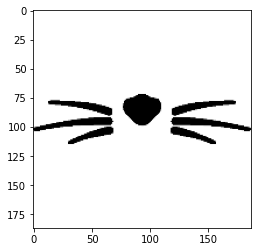

In [7]:
# '고양이 수염 이미지 불러오기 및 resize' : dlib_rect 크기에 맞게 resize

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)
print ('고양이수염 size :', img_sticker.shape)

In [8]:
# 'x, y 좌표 조정' : 고양이 수염 이미지가 놓일 좌표(이미지 시작점(0,0)은 좌측 상단!)

refined_x = x - w // 2  # 코 중심점에서 dlib_rect 너비의 절반 만큼 왼쪽으로 이동
refined_y = y - w // 2  # 코 중심점에서 dlib_rect 너비의 절반 만큼 위로 이동
print ('조정 (x,y) : (%d,%d)'%(refined_x, refined_y))

조정 (x,y) : (263,95)


#### 1-5. 스티커 적용

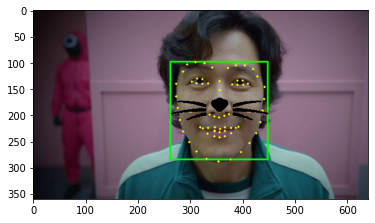

In [9]:
# '고양이 수염 스티커 적용'

# - 스티커 영역 : 조정된 (x,y) 좌표에 스티커 크기 만큼을 더해주면 바로 스티커 영역!
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# - 배경 이미지에 스티커 이미지 적용 : 스티커 이미지에서 255인 부분은 sticker_area로 사용하고, 255가 아닌 부분은 img_sticker를 다시 적용
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

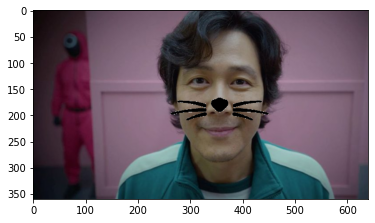

In [10]:
# '고양이 수염 스티커 원본 이미지(img_bgr)에 적용' : 원본 이미지에는 dlib_rect과 landmakr_point가 없기 때문!

img_bgr_copy = img_bgr.copy() # 투명도 조절된 스티커를 붙이기 위해 미리 복사

sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

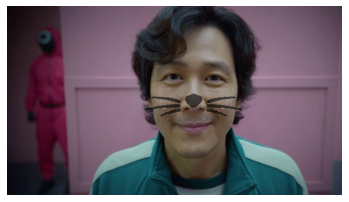

In [11]:
# '스티커 투명도 조절' : cv2.addweighted()

sticker_area = img_bgr_copy[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr_copy[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,cv2.addWeighted(img_sticker, 0.6, sticker_area, 0.4, 0)).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr_copy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


### Step 2. 비스듬한 얼굴 각도에 스티커 적용
#### 2-1. 이미지 로드 및 얼굴, 랜드마크 검출

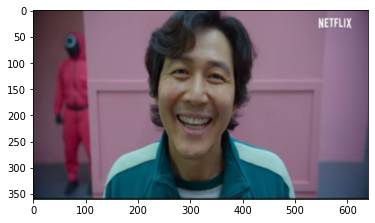

rectangles[[(236, 81) (390, 236)]]
landmarks points : 68


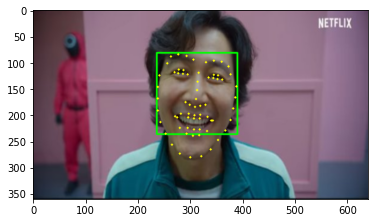

In [42]:
# 이미지 로드
import os, cv2

my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/image_rotate.jpg'
img_rotate_bgr = cv2.imread(my_image_path)
img_rotate_bgr = cv2.resize(img_rotate_bgr, (640, 360))
img_rotate_show = img_rotate_bgr.copy()

img_rotate_rgb = cv2.cvtColor(img_rotate_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rotate_rgb)
plt.show()


# 얼굴 및 랜드마크 검출
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_rotate_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_rotate_show_rgb =  cv2.cvtColor(img_rotate_show, cv2.COLOR_BGR2RGB)

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print('landmarks points :', len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_rotate_show, point, 2, (0, 255, 255), -1) 

img_rotate_show_rgb = cv2.cvtColor(img_rotate_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_rotate_show_rgb)
plt.show()

#### 2-2 스티커 위치 좌표 확인 및 적용

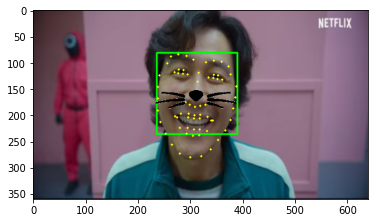

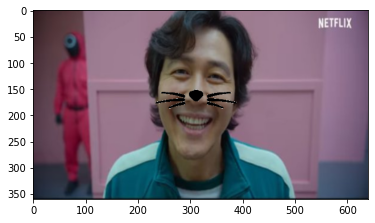

In [41]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2
refined_y = y - w // 2

sticker_area = img_rotate_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 사본 이미지
img_rotate_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_rotate_show, cv2.COLOR_BGR2RGB))
plt.show()

# 원본 이미지
sticker_area = img_rotate_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_rotate_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_rotate_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### 2-3 고양이 수염 회전시켜서 적용하기

- 얼굴 각도가 약간 기울어져도 얼굴과 랜드마크가 잘 검출되고 스티커도 붙었다.

- 그러나 얼굴 각도와 스티커 각도가 달라 어색하다.

- 고양이 수염 스티커를 회전하여 붙일 수 있는 방법이 필요하다

### Step3 . 다양한 얼굴 밝기에 스티커 적용
#### 3-1. 이미지 로드 및 얼굴, 랜드마크 검출

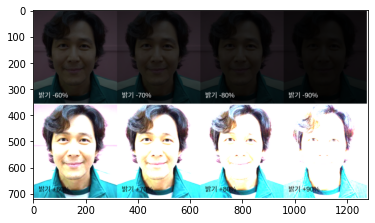

rectangles[[(386, 449) (572, 634)], [(386, 98) (572, 284)], [(43, 440) (266, 663)], [(696, 98) (882, 284)], [(56, 98) (242, 284)], [(696, 449) (882, 634)], [(1026, 98) (1212, 284)]]
landmarks points : 68


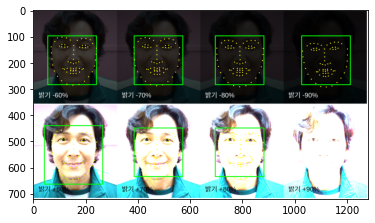

In [36]:
# 이미지 로드
import dlib
import os, cv2

my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/brightness.png'
brightness_bgr = cv2.imread(my_image_path)
brightness_bgr = cv2.resize(brightness_bgr, (1280, 720))
brightness_show = brightness_bgr.copy()

brightness_rgb = cv2.cvtColor(brightness_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(brightness_rgb)
plt.show()


# 얼굴 및 랜드마크 검출
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(brightness_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(brightness_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

brightness_show_rgb =  cv2.cvtColor(brightness_show, cv2.COLOR_BGR2RGB)

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(brightness_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print('landmarks points :', len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(brightness_show, point, 2, (0, 255, 255), -1) 

brightness_show_rgb = cv2.cvtColor(brightness_show, cv2.COLOR_BGR2RGB)
plt.imshow(brightness_show_rgb)
plt.show()

#### 3-2 스티커 위치 좌표 확인 및 적용

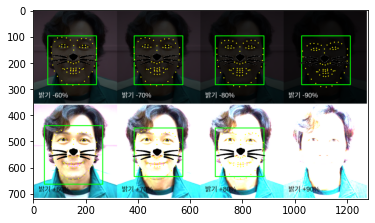

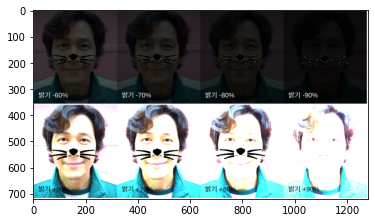

In [37]:
# 스티커 불러오기
w = dlib_rect.width()
h = dlib_rect.width()
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

# 스티커 위치 좌표 확인할 때마다 스티커 적용
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    
    x = landmark[30][0]
    refined_x = x - w // 2
    y = landmark[30][1]
    refined_y = y - w // 2

    # 사본 이미지 적용
    sticker_area = brightness_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    brightness_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    # 원본 이미지 적용
    sticker_area = brightness_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    brightness_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area, img_sticker).astype(np.uint8)

# 사본 이미지 출력
plt.imshow(cv2.cvtColor(brightness_show, cv2.COLOR_BGR2RGB))
plt.show()

# 원본 이미지 출력
plt.imshow(cv2.cvtColor(brightness_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### Step 4. 다양한 얼굴 거리에 스티커 적용

#### **4-1 상반신 거리**

**4-1-1 이미지 로드 및 얼굴, 랜드마크 검출**

- [이정재 상반신 사진](https://news.nate.com/view/20210915n17200?mid=n1101)

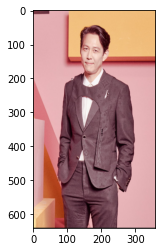

rectangles[[(129, 96) (204, 171)]]
landmarks points : 68


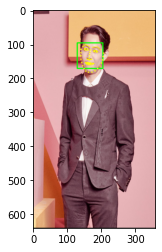

In [7]:
# 이미지 로드
import dlib
import os, cv2

my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/distance1.jpg'
img_distance1_bgr = cv2.imread(my_image_path)
img_distance1_bgr = cv2.resize(img_distance1_bgr, (360, 640))
img_distance1_show = img_distance1_bgr.copy()

img_distance1_rgb = cv2.cvtColor(img_distance1_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_distance1_rgb)
plt.show()


# 얼굴 및 랜드마크 검출
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_distance1_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_distance1_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_distance1_show_rgb =  cv2.cvtColor(img_distance1_show, cv2.COLOR_BGR2RGB)

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_distance1_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print('landmarks points :', len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_distance1_show, point, 2, (0, 255, 255), -1) 

img_distance1_show_rgb = cv2.cvtColor(img_distance1_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_distance1_show_rgb)
plt.show()

**4-1-2 스티커 위치 좌표 확인 및 적용**

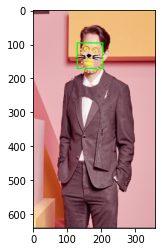

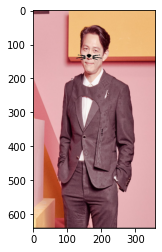

In [11]:
# 스티커 위치 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2
refined_y = y - w // 2

sticker_area = img_distance1_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 사본 이미지 적용
img_distance1_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_distance1_show, cv2.COLOR_BGR2RGB))
plt.show()

# 원본 이미지 적용
sticker_area = img_distance1_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_distance1_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_distance1_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### **4-2 전신 거리**

**4-2-1 이미지 로드 및 얼굴, 랜드마크 검출**

- [이정재 전신 사진](http://isplus.live.joins.com/news/article/article.asp?total_id=24143522&ctg=1502&tm=i_ntr_c011&tag=)

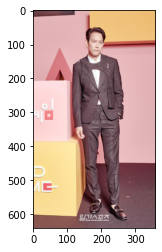

rectangles[[(165, 84) (208, 127)]]
landmarks points : 68


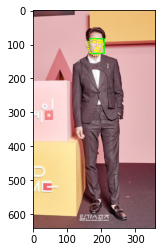

In [12]:
# 이미지 로드
import dlib
import os, cv2

my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/distance2.jpg'
img_distance2_bgr = cv2.imread(my_image_path)
img_distance2_bgr = cv2.resize(img_distance2_bgr, (360, 640))
img_distance2_show = img_distance2_bgr.copy()

img_distance2_rgb = cv2.cvtColor(img_distance2_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_distance2_rgb)
plt.show()


# 얼굴 및 랜드마크 검출
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_distance2_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_distance2_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_distance2_show_rgb =  cv2.cvtColor(img_distance2_show, cv2.COLOR_BGR2RGB)

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_distance2_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print('landmarks points :', len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_distance2_show, point, 2, (0, 255, 255), -1) 

img_distance2_show_rgb = cv2.cvtColor(img_distance2_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_distance2_show_rgb)
plt.show()

**4-2-2 스티커 위치 좌표 확인 및 적용**

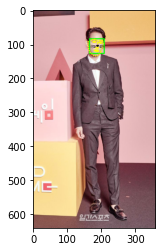

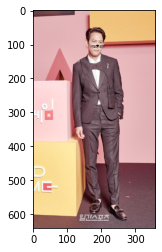

In [13]:
# 스티커 위치 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2
refined_y = y - w // 2

sticker_area = img_distance2_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 사본 이미지 적용
img_distance2_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_distance2_show, cv2.COLOR_BGR2RGB))
plt.show()

# 원본 이미지 적용
sticker_area = img_distance2_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_distance2_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_distance2_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### Step5 . 여러 얼굴에 스티커 적용

#### 5-1. 이미지 로드 및 얼굴, 랜드마크 검출

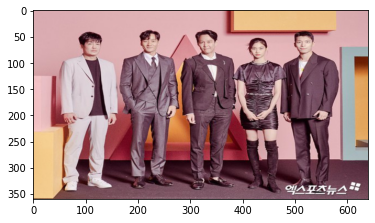

rectangles[[(309, 46) (345, 82)], [(409, 62) (445, 98)], [(97, 50) (133, 86)], [(497, 50) (533, 86)]]
landmarks points : 68


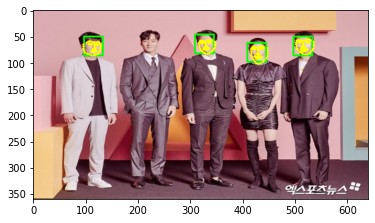

In [40]:
# 이미지 로드
import dlib
import os, cv2

my_image_path = os.getenv('HOME') + '/aiffel/camera_sticker/images/many.jpg'
many_bgr = cv2.imread(my_image_path)
many_bgr = cv2.resize(many_bgr, (640, 360))
many_show = many_bgr.copy()

many_rgb = cv2.cvtColor(many_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(many_rgb)
plt.show()


# 얼굴 및 랜드마크 검출
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(many_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(many_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

many_show_rgb =  cv2.cvtColor(many_show, cv2.COLOR_BGR2RGB)

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(many_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print('landmarks points :', len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(many_show, point, 2, (0, 255, 255), -1) 

many_show_rgb = cv2.cvtColor(many_show, cv2.COLOR_BGR2RGB)
plt.imshow(many_show_rgb)
plt.show()

#### 5-2 스티커 위치 좌표 확인 및 적용

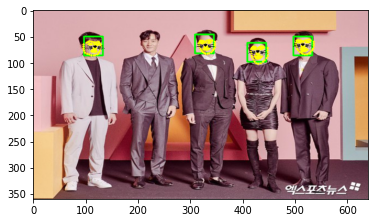

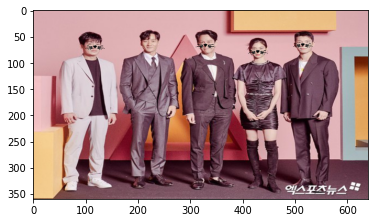

In [41]:
# 스티커 불러오기
w = dlib_rect.width()
h = dlib_rect.width()
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

# 스티커 위치 좌표 확인할 때마다 스티커 적용
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    refined_x = x - w // 2
    y = landmark[30][1]
    refined_y = y - w // 2

    # 사본 이미지 적용
    sticker_area = many_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    many_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

    # 원본 이미지 적용
    sticker_area = many_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    many_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area, img_sticker).astype(np.uint8)

# 사본 이미지 출력
plt.imshow(cv2.cvtColor(many_show, cv2.COLOR_BGR2RGB))
plt.show()

# 원본 이미지 출력
plt.imshow(cv2.cvtColor(many_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### < 정리 및 회고 >

#### 1. 스티커 위치 문제(해결)
- 처음에는 코드를 상세히 이해하지 않고 노드의 코드를 참고해서 작성하다보니, 수염이 얼굴 위(왕관 위치)에 위치했다. 도대체 어떻게하면 수염의 위치를 얼굴 중앙으로 할 수 있을까 고민하다가 '스티커 영역' 설정을 잘 해야 하는 것을 알게 됬고, 스티커가 시작할 좌표를 잘 잡아야하는 것을 알게 되었다. 왕관 스티커는 스티커 위치 좌표를 코 중심점에서 y축만 이동하였는데, 고양이 스티커는 x축도 함께 이동해야 했다. 또한 crop할 영역의 범위도 잘 설정해주어야했다.

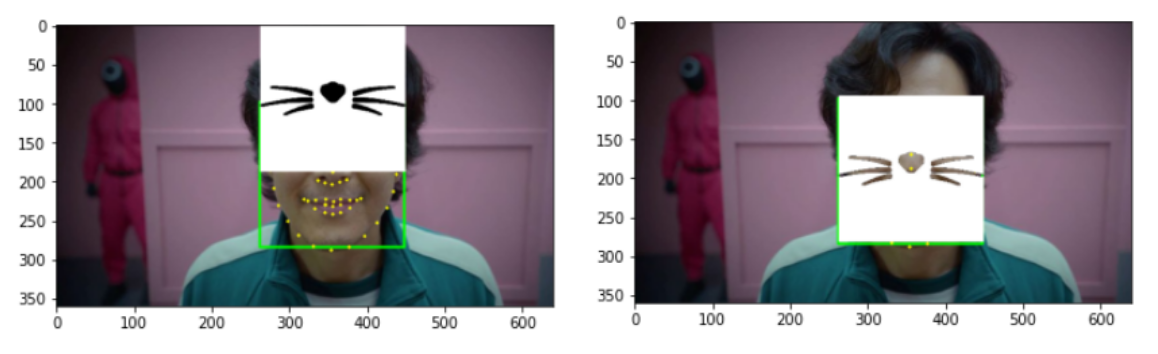

#### 2. 스티커 색상 문제(해결)
- 스티커를 적용하니 하얀 배경으로 가득차서 어떻게 해야 배경없이 수염만 나올지를 찾는데 한 참 시간을 보냈다. np.where()에 대해서 자세히 이해한 이후에 img_sticker==0이 아니라, img_sticker==255로 바꾸어 문제를 해결하였다..

- [참고] [numpy의 where 함수 사용법](https://pinkwink.kr/1236)

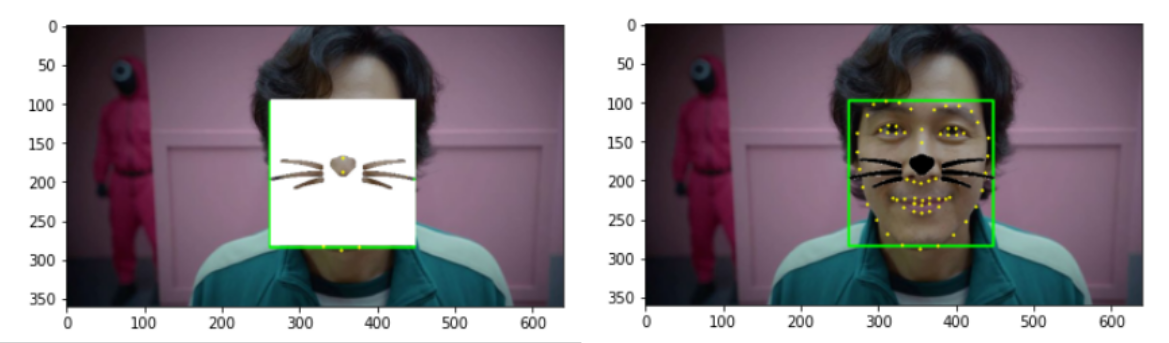

#### 3. 이미지(스티커) 투명도 조절(해결)

- 어떻게하면 이미지의 투명도를 조절할 수 있을지 찾아보다가, cv2.addweighted()를 이용해 조절할 수 있는 것는 알게되었다. 스티커가 검정색에서 투명도가 약해지며 회색에 까깝게 변하고 얼굴색이 드러나게 되었다.

- [참고] [영상의 산술 연산 - cv2.addweighted()](https://deep-learning-study.tistory.com/115)

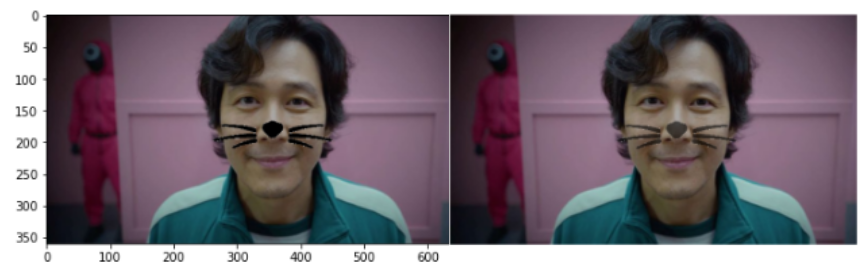

#### 4. 얼굴 각도에 따른 스티커 각도 변형 문제(미해결)



- 오랜 시간 찾아보았는데, 얼굴이 기울어진 만큼을 계산하여 스티커에도 적용해야만 문제가 해결될 것 같았다. 하지만 이를 계산하는 수학적 이해와 코드로 구현하는 코딩 실력이 아직 부족하여 결국 해결하지 못하였고 아쉬움이 남는다.

- 또한 어느 정도의 각도까지 얼굴이 기울어져도 얼굴 및 랜드마크 검출이 가능한지도 궁금하다. 랜드마크 검출 모델 명이 **'frontal'** 이여서 아무래도 정면 얼굴에 가까워야 잘 검출이 될것 같기도 하다.

#### 5. 밝기

- STEP1에서 사용한 이미지의 밝기를 조절하여 얼굴 및 랜드마트 검출, 스티커 적용을 실시하였다.
- 밝기를 -60% 부터 -90% 까지, +60% 부터 +90%까지 바꾸었다.
- 밝기 +90% 인물만 얼굴 및 랜드마크 검출이 실패하였다.
- 시간 여유가 있다면 코드로 밝기를 조절하는 방법도 찾아서 적용해보았을 텐데 그러지 못했다. 다음 기회에 시도해 보겠다.
- 밝기별 이미지를 따로 사용한 것이아니라, 한 장의 이미지로 사용하다보니 여러 인물의 얼굴을 검출하고 스티커를 적용하게 되었는데 처음에는 문제가 발생했다. 이와 관련해서는 아래 회고 6번에서 작성하겠다.

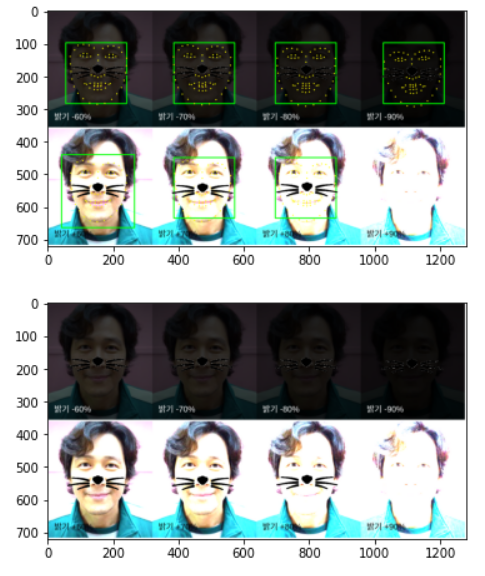

#### 6. 거리
- 거리에 따른 차이를 알아보기 위해, 동일 인물 1인이 동일 장소에서 찍은 거리가 다른 사진을 구했다.

- 첫번째 사진은 **'상반신'**이 모두 보이는 거리의 사진이고, 두번째 사진은 **'전신'**이 모두 보이는 사진이다. 두 사진 모두 스티커가 잘 적용된 것을 확인할 수 있다.

- 시간상 조금 더 먼 거리의 인물 사진을 대상으로 시도해 보지 못했지만, 추후에 보다 더 다양한 거리의 인물 사진으로 시도해보고 싶다.

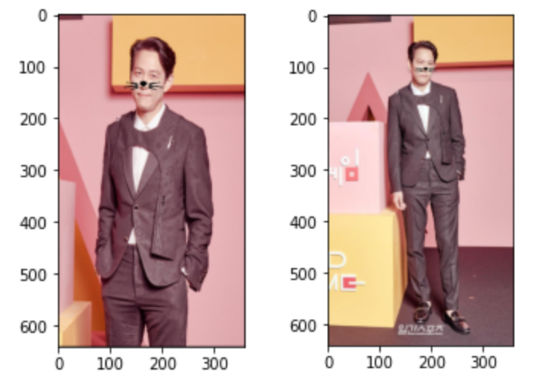

#### 7. 여러 인물 얼굴 인식 및 스티커 적용 문제(부분 해결)

- 여러 인물의 얼굴에 스티커를 적용하는 문제는 다양한 밝기의 이미지 단계에서 발생했다.

- +80% 밝기의 이미지까지 얼굴 및 랜드마크 검출이 잘 되었으나, 정작 스티커는 한 얼굴(마지막 얼굴)에만 적용된 것이다.

- 고민하다가 스티커를 확인할 때마다, 스티커도 적용도 하게끔 for문 코드를 수정하였더니 스티커가 얼굴과 랜드마크가 검출된 이미지에는 스티커가 모두 적용되었다.

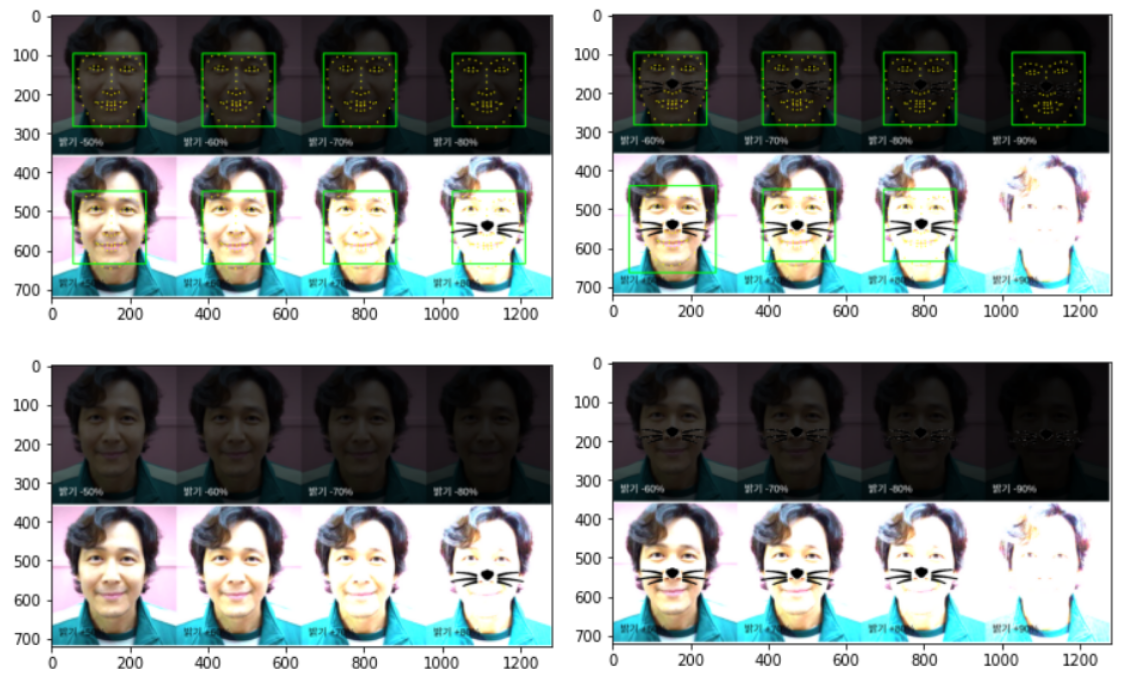

- 한편, 거리에 따른 스티커 적용에서 전신 인물도 충분히 스티커 적용이 가능한 듯하여, 여러 인물이 전신으로 보이는 이미지에도 시도를 해보았다.

- 먼저 얼굴 및 랜드마크 검출, 스티커 적용이 5명 중 4명만 성공하였다. 비슷한 위치, 거리, 크기의 얼굴인데 왜 한 명이 검출되지 않았는지 잘 모르겠다.

- 조금더 가까운 거리에 있는 인물 사진(얼굴이 크게 나오는 사진)과 적은 수의 인물 사진으로 시도하면 지금보다 더 잘 검출되고 스티커가 적용되지 않을까 싶다.

- 추후에 인물의 수를 2명에서부터 차근차근 늘려가면서 몇명까지 검출과 스티커 적용이 가능한지 시도해보고 싶고, 왜 모든 인물이 검출되지 않는지 그 원인도 알아보고 싶다.

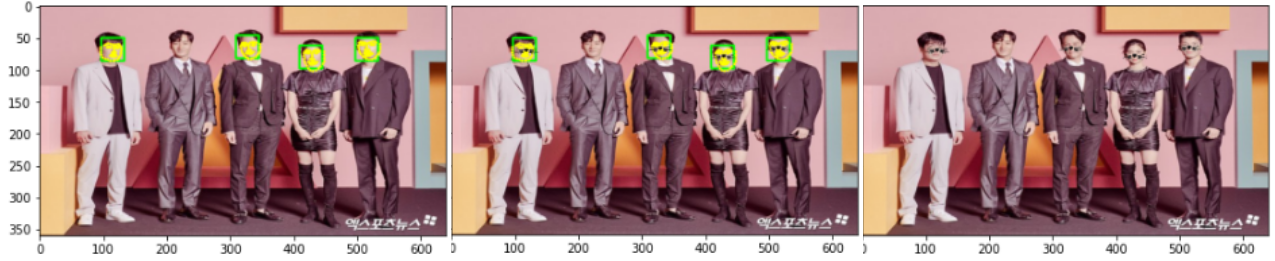

#### 8. 기타

- 반복되는 코드 작업을 효율적으로 하기 위해서는 함수와 클래스로 정의하여 프로젝트를 진행해야하는데 아직 함수와 클래스 선언에 대한 공부가 부족함을 다시 한번 더 느꼈다. 함수와 클래스 공부로 객체지향프로그래밍 연습을 더 열심히 해야겠다.

- 프로젝트를 진행하면서 이미지 버전 관리와 변수명의 중요성을 느끼게되었다. 여러 이미지 파일을 사용하고 그 이미지에 다양한 작업을 하다보니 여러번 에러가 발생하였다. 프로젝트에 사용되는 파일의 원본과 카피본을 잘 구분하고, 변수명도 잘 선언해야겠다.

- open cv를 처음 사용해보면서 딥러닝 CV를 처음 접하였는데 굉장히 흥미롭고 재미있었다. 다만 아직 구체적인 작동원리를 이해하지 못해 공부가 많이 필요할 듯 하다.